<a href="https://colab.research.google.com/github/vikrantmehta123/ML-Algs/blob/main/PCA_MNIST_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Getting Dataset

The code executes PCA on the [MNIST dataset](https://en.wikipedia.org/wiki/MNIST_database). Run the cell given below to get the data-matrix $\mathbf{X}$, which is of shape $(n, d)$, where $n$ denotes the number of samples and $d$ denotes the number of features.

In [ ]:
import numpy as np
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


### Flatten the Data

Convert each of the image into a 1D array from 2D. The following cell converts each of the image from shape $(28, 28)$ to $(784)$.

In [ ]:
X = X_train.reshape(-1, 28 * 28)
np.shape(X)

(60000, 784)

## Plot Samples

Run the following cell to plot the first ten images from the dataset in $2 \times 5 $ grid.

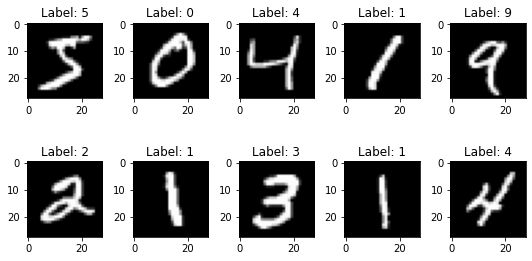

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

num = 10
images = X[:num]
labels = y_train[:num]

num_row = 2
num_col = 5
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(num):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(images[i].reshape((28, 28)), cmap='gray')
    ax.set_title('Label: {}'.format(labels[i]))
plt.tight_layout()
plt.show()

## Centering the Dataset

Run the cell below to compute the mean vector and then center the dataset. The code creates a new matrix 'new_X' which is zero mean.

In [ ]:
mean_vector = np.mean(X, axis=0)
new_X = X - mean_vector


## Covariance Matrix

Run the cell below to compute the covariance matrix of the centered dataset. It is important that the data be centered. Thus, make sure that you run the previous cell before running this one.

In [ ]:
n = X.shape[0]
C = (1/n) * (np.transpose(new_X) @ new_X)

## Computing the Principal Components:

Run the cell below to compute the first and second principal components of the dataset, $\mathbf{w}_1$ and $\mathbf{w}_2$. These are the eigenvectors corresponding to the highest eigenvalues of the Covariance Matrix.

In [ ]:
eig_val, eig_vec = np.linalg.eig(C)
indices = np.argsort(eig_val)[::-1]

w1 = eig_vec[:,0]
w2 = eig_vec[:,1]

## Plot the Principal Components

Run the cell below to the plot the two principal components computed before.

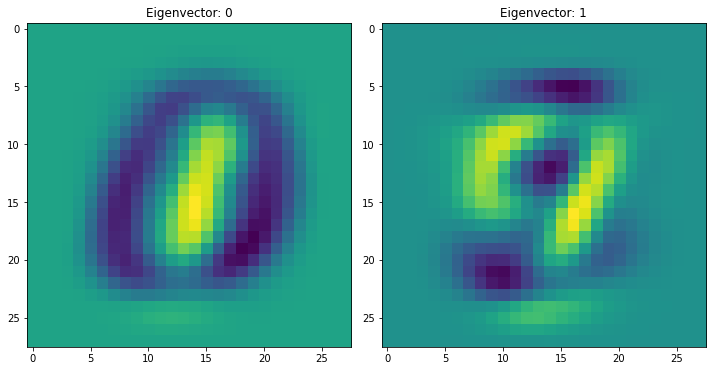

In [ ]:
num_row = 1
num_col = 2
fig, axes = plt.subplots(num_row, num_col, figsize=(10,10))
for i in range(2):
    ax = axes[i]
    w = np.array([float(x) for x in eig_vec[:,i]])
    ax.imshow(w.reshape((28, 28)))
    ax.set_title(f'Eigenvector: {i}')
plt.tight_layout()
plt.show()


## Find the Number of Principal Components Required

Run the cell below to find the smallest value of $k$ such that the principal components capture at least $95 \%$ of variance in the data. 

In [ ]:
eig_val = np.sort(eig_val)[::-1]

i = 0
k_sum = 0
d_sum = np.sum(eig_val)

while (k_sum/d_sum) < 0.2:
  k_sum += eig_val[i]
  i += 1
i

3

## Reconstruction
Given a `test_image`, compress the image and reconstruct it using the top $k$ principal components. Consider four values of $k$; values of $k$ for which the top-$k$ principal components explain:

- 20% of the variance
- 50% of the variance
- 80% of the variance
- 95% of the variance



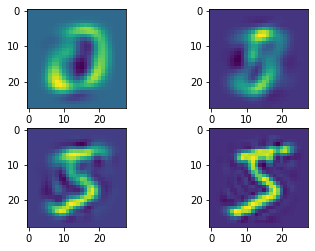

In [ ]:
img = X[0]

values = [3, 11, 44, 154]

for k in range(len(values)):
  res = np.zeros(784,)
  for i in range(values[k]):
    e_vec = eig_vec[:,i]
    comb = np.dot(img, e_vec)
    comb = comb * e_vec
    for j in range(comb.shape[0]):
      res[j] += float(comb[j])
    ax = plt.subplot(2, 2, k + 1)
    ax.imshow(res.reshape((28, 28)))